In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [3]:
df = pd.read_csv("mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [7]:
df.shape

(2000, 26)

In [8]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [4]:
# Dropping the 'Unnamed: 0' and 'veil_type' columns
df = df.drop(['Unnamed: 0', 'veil_type'], axis=1)


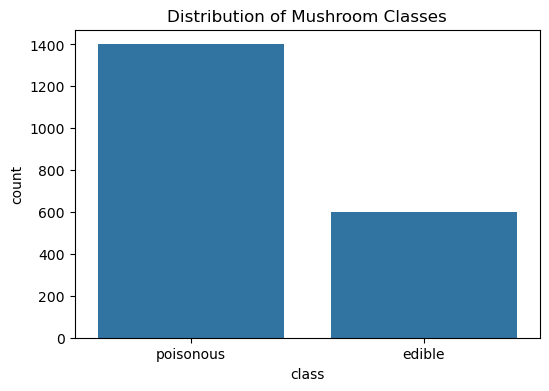

In [5]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class')
plt.title('Distribution of Mushroom Classes')
plt.show()


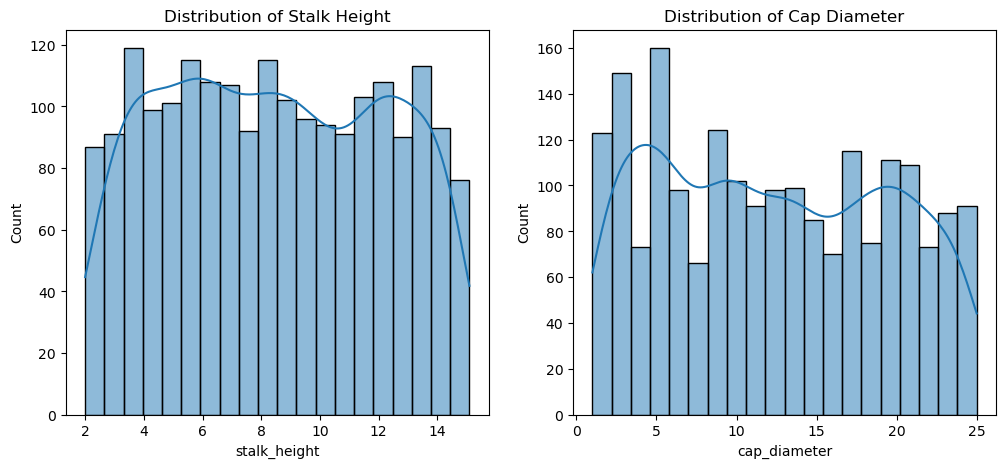

In [6]:
# Visualize distributions of numerical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['stalk_height'], kde=True, bins=20)
plt.title('Distribution of Stalk Height')
plt.subplot(1, 2, 2)
sns.histplot(df['cap_diameter'], kde=True, bins=20)
plt.title('Distribution of Cap Diameter')
plt.show()

In [7]:
# Task 2: Data Preprocessing
X = df.drop('class', axis=1)
y = df['class']

In [8]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


In [9]:
# Task 4: SVM Implementation
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


In [10]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("--- Initial SVM Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))


--- Initial SVM Model Evaluation ---
Accuracy: 0.6675

Classification Report:
              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       133
   poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



In [ ]:
# Task 6: Parameter Tuning and Optimization
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("\n--- Parameter Tuning Results ---")
print(f"Best parameters found: {grid_search.best_params_}")
best_svm_model = grid_search.best_estimator_
y_pred_tuned = best_svm_model.predict(X_test)
print("\nEvaluation of Tuned Model:")
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {accuracy_tuned:.4f}")
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_, zero_division=0))



In [ ]:
# Task 7: Comparison and Analysis
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_kernel', 'param_C', 'mean_test_score']]
results.rename(columns={'mean_test_score': 'Mean Accuracy'}, inplace=True)
print("\n--- Performance comparison of different kernels and C values ---")
print(results)

In [22]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    print("Dropped 'Unnamed: 0' column.")


Dropped 'Unnamed: 0' column.


In [23]:
# Drop 'veil-type' and 'stalk-root' if they exist in the DataFrame
columns_to_drop = ['veil-type', 'stalk-root']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if existing_columns_to_drop:
    df.drop(existing_columns_to_drop, axis=1, inplace=True)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("Columns 'veil-type' and 'stalk-root' not found, they may have already been dropped.")

# Separate features (X) and target (y)
y = df['class']
X = df.drop('class', axis=1)


Columns 'veil-type' and 'stalk-root' not found, they may have already been dropped.


In [26]:
# Label encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [27]:
# One-hot encode the feature variables
X_encoded = pd.get_dummies(X, columns=X.columns, drop_first=True)


In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

print("Shape of the training data:", X_train.shape)
print("Shape of the testing data:", X_test.shape)
print("Class distribution (0=edible, 1=poisonous):")
print(y.value_counts())
print("-" * 50)


Shape of the training data: (1400, 2049)
Shape of the testing data: (600, 2049)
Class distribution (0=edible, 1=poisonous):
class
poisonous    1400
edible        600
Name: count, dtype: int64
--------------------------------------------------


In [29]:
def train_and_evaluate_svm(kernel_type, X_train, y_train, X_test, y_test):
    """Trains and evaluates an SVM model with a specified kernel."""
    print(f"Training SVM with {kernel_type.upper()} kernel...")
    svm_model = SVC(kernel=kernel_type, random_state=42)
    svm_model.fit(X_train, y_train)
    
    y_pred = svm_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))
    print("-" * 50)

# Train and evaluate models for different kernels
train_and_evaluate_svm('linear', X_train, y_train, X_test, y_test)
train_and_evaluate_svm('rbf', X_train, y_train, X_test, y_test)
train_and_evaluate_svm('poly', X_train, y_train, X_test, y_test)

Training SVM with LINEAR kernel...
Model Evaluation:
Accuracy: 0.8750
Precision: 0.8778
Recall: 0.9518
F1-Score: 0.9133

Classification Report:
              precision    recall  f1-score   support

      Edible       0.87      0.70      0.78       185
   Poisonous       0.88      0.95      0.91       415

    accuracy                           0.88       600
   macro avg       0.87      0.83      0.84       600
weighted avg       0.87      0.88      0.87       600

--------------------------------------------------
Training SVM with RBF kernel...
Model Evaluation:
Accuracy: 0.8150
Precision: 0.7923
Recall: 0.9928
F1-Score: 0.8813

Classification Report:
              precision    recall  f1-score   support

      Edible       0.96      0.42      0.58       185
   Poisonous       0.79      0.99      0.88       415

    accuracy                           0.81       600
   macro avg       0.88      0.70      0.73       600
weighted avg       0.84      0.81      0.79       600

----------

In [15]:
df.duplicated().sum()

np.int64(1024)

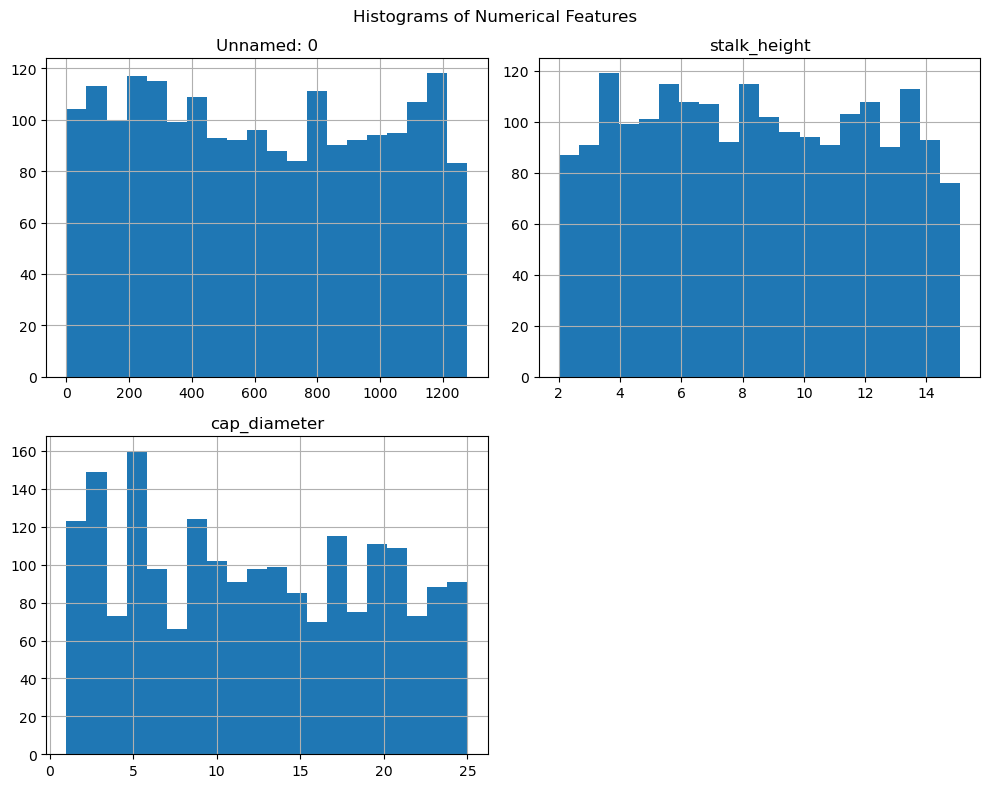

In [18]:
# Histogram for numerical features
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

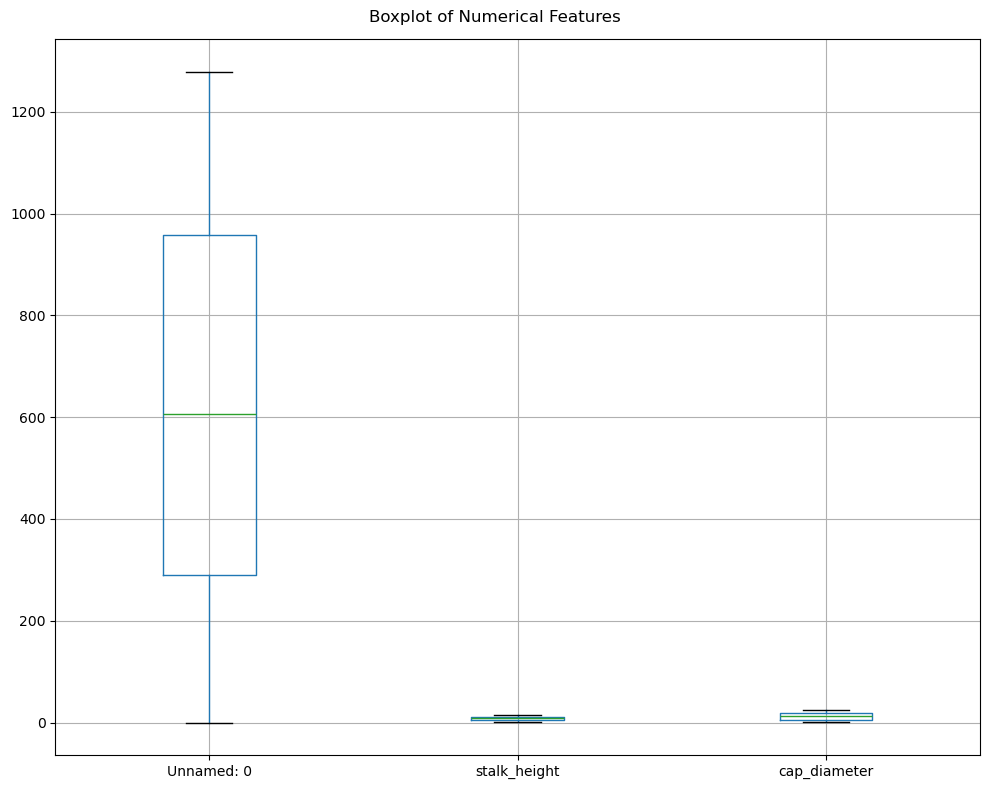

In [20]:
# Boxplot for numerical features
df.boxplot(figsize=(10, 8))
plt.suptitle("Boxplot of Numerical Features")
plt.tight_layout()
plt.show()